In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox ## z-transformation // standard scaler 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Load data 

In [2]:
ca_df= pd.read_csv ("data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

# Cleaning data 

## All those steps where did before 
- 1 Standardize column names
- 2 Deleting and rearranging columns
- 3 Working with data types (set the correct type)
- 4 Filtering data
- 5 Removing duplicates
- 6 Correcting typos
- 7 Conditional formatting
- 8 Replace missing values


# Split df to numerical and categorical features 

In [5]:
ca_numerical=ca_df._get_numeric_data()
ca_categorical=ca_df.select_dtypes(include=["object"])

ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
ca_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [7]:
ca_numerical.drop(columns=["number_of_open_complaints"],axis=1, inplace=True)
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


In [8]:
l= ca_df["number_of_open_complaints"]
ca_categorical.insert(0, "number_of_open_complaints",l)

In [9]:
ca_categorical.drop(columns=["effective_to_date"],axis=1, inplace=True)

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
ca_categorical

,number_of_open_complaints,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,0,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,0,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,0,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,0,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,0,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,0,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,4,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


# Hot / Labeld  Encoding

## Labeld

- we are doing all ordinal features into a new df called ca_categorical_ordinal 

In [11]:
# labeled ordinal features 
# coverage
# education
# month
# policy 
ca_categorical_ordinal=pd.DataFrame(ca_categorical[["coverage", "education", "month", "policy"]])
ca_categorical_ordinal

,coverage,education,month,policy
0,basic,college,feb,corporate l3
1,basic,college,jan,personal l3
2,basic,bachelor,feb,personal l3
3,extended,college,jan,corporate l3
4,premium,bachelor,jan,personal l2
...,...,...,...,...
10684,premium,bachelor,jan,personal l1
10685,basic,college,jan,personal l3
10686,extended,bachelor,feb,corporate l3
10687,premium,college,feb,personal l1


In [12]:
ca_categorical_ordinal.coverage.value_counts()

basic       6523
extended    3206
premium      960
Name: coverage, dtype: int64

In [13]:
coverage={"basic":1,"extended":2,"premium":3}


In [14]:
ca_categorical_ordinal[["coverage"]]=ca_categorical_ordinal[["coverage"]].replace(coverage)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,college,feb,corporate l3
1,1,college,jan,personal l3
2,1,bachelor,feb,personal l3
3,2,college,jan,corporate l3
4,3,bachelor,jan,personal l2
...,...,...,...,...
10684,3,bachelor,jan,personal l1
10685,1,college,jan,personal l3
10686,2,bachelor,feb,corporate l3
10687,3,college,feb,personal l1


In [15]:
ca_categorical_ordinal.education.value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64

In [16]:
education={"high school or below":1,"college":2,"bachelor":3, "master":4, "doctor":5}

In [17]:
ca_categorical_ordinal[["education"]]=ca_categorical_ordinal[["education"]].replace(education)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,feb,corporate l3
1,1,2,jan,personal l3
2,1,3,feb,personal l3
3,2,2,jan,corporate l3
4,3,3,jan,personal l2
...,...,...,...,...
10684,3,3,jan,personal l1
10685,1,2,jan,personal l3
10686,2,3,feb,corporate l3
10687,3,2,feb,personal l1


In [18]:
ca_categorical_ordinal.month.value_counts()

jan    5684
feb    5005
Name: month, dtype: int64

In [19]:
month={"jan":1,"feb":2}

In [20]:
ca_categorical_ordinal[["month"]]=ca_categorical_ordinal[["month"]].replace(month)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,corporate l3
1,1,2,1,personal l3
2,1,3,2,personal l3
3,2,2,1,corporate l3
4,3,3,1,personal l2
...,...,...,...,...
10684,3,3,1,personal l1
10685,1,2,1,personal l3
10686,2,3,2,corporate l3
10687,3,2,2,personal l1


In [21]:
ca_categorical_ordinal.policy.value_counts()

personal l3     4006
personal l2     2478
personal l1     1453
corporate l3    1199
corporate l2     684
corporate l1     429
special l2       192
special l3       170
special l1        78
Name: policy, dtype: int64

In [22]:
policy={"personal l3":1,"personal l1":1,"personal l2":1,"corporate l3":2,"corporate l2":2, "corporate l1":2,"speical l3":3,"speical l2":3,"speical l1":3}

In [23]:
ca_categorical_ordinal[["policy"]]=ca_categorical_ordinal[["policy"]].replace(policy)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,2
1,1,2,1,1
2,1,3,2,1
3,2,2,1,2
4,3,3,1,1
...,...,...,...,...
10684,3,3,1,1
10685,1,2,1,1
10686,2,3,2,2
10687,3,2,2,1


## Hot 
- we will put all nominal features in a new df called ca_categorical_hot

In [24]:
ca_categorical.info() 
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   number_of_open_complaints  10689 non-null  int64 
 1   region                     10689 non-null  object
 2   response                   10689 non-null  object
 3   coverage                   10689 non-null  object
 4   education                  10689 non-null  object
 5   month                      10689 non-null  object
 6   employment_status          10689 non-null  object
 7   gender                     10689 non-null  object
 8   location_code              10689 non-null  object
 9   marital_status             10689 non-null  object
 10  policy_type                10689 non-null  object
 11  policy                     10689 non-null  object
 12  renew_offer_type           10689 non-null  object
 13  sales_channel              10689 non-null  object
 14  vehicl

In [25]:
ca_categorical.gender.value_counts()

f    5469
m    5220
Name: gender, dtype: int64

In [26]:
ca_categorical.response.value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [27]:
ca_categorical.sales_channel.value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [28]:
ca_categorical.location_code.value_counts()

suburban    6742
rural       2086
urban       1861
Name: location_code, dtype: int64

In [29]:
ca_categorical.marital_status.value_counts()

married     6199
single      2910
divorced    1580
Name: marital_status, dtype: int64

In [30]:
ca_categorical.vehicle_size.value_counts()

medsize    7528
small      2049
large      1112
Name: vehicle_size, dtype: int64

In [31]:
ca_categorical.vehicle_class.value_counts()

four-door car    5424
two-door car     2185
suv              2103
sports car        565
luxury suv        213
luxury car        199
Name: vehicle_class, dtype: int64

In [32]:
ca_categorical.policy_type.value_counts()

personal auto     7937
corporate auto    2312
special auto       440
Name: policy_type, dtype: int64

In [33]:
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

In [34]:
# all nominal features are getting hot encoded 
ca_categorical_hot=pd.get_dummies(ca_categorical[["region","response","gender","policy_type","employment_status","vehicle_class","vehicle_size","marital_status","location_code"]], drop_first=True)

In [35]:
ca_categorical_hot

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
10685,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


- now we can concateinate ca_categorical_hot and ca_categorical_ordinal

- then insert the number_of_open_complaints
- and renew_offer_type 
    - look that you need to cut the str "offer" and then change the numbers from str to int

In [36]:
categorical_features=pd.concat([ca_categorical_hot,ca_categorical_ordinal],axis=1)
categorical_features

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,1,0,1,3,2,1
3,0,1,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,2,2,1,2
4,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,2,3,2,2
10687,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,3,2,2,1


In [37]:
categorical_features.insert(0,"number_of_open_complaints",ca_categorical["number_of_open_complaints"])
categorical_features

,number_of_open_complaints,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,0,1,0,0,0,1,1,0,1,0,...,1,0,0,1,1,0,1,3,2,1
3,0,0,1,0,1,1,0,0,1,0,...,1,0,0,1,1,0,2,2,1,2
4,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,2,3,2,2
10687,4,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,3,2,2,1


In [56]:
ca_categorical.renew_offer_type.value_counts()

1    4394
2    3378
3    1714
4    1203
Name: renew_offer_type, dtype: int64

In [39]:
ca_categorical["renew_offer_type"]=ca_categorical["renew_offer_type"].map(lambda x: int(x.lstrip("offer")))

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
categorical_features.insert(0,"renew_offer_type",ca_categorical["renew_offer_type"])
categorical_features

ValueError: cannot insert renew_offer_type, already exists

# Check correlated features in numerical

In [41]:
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


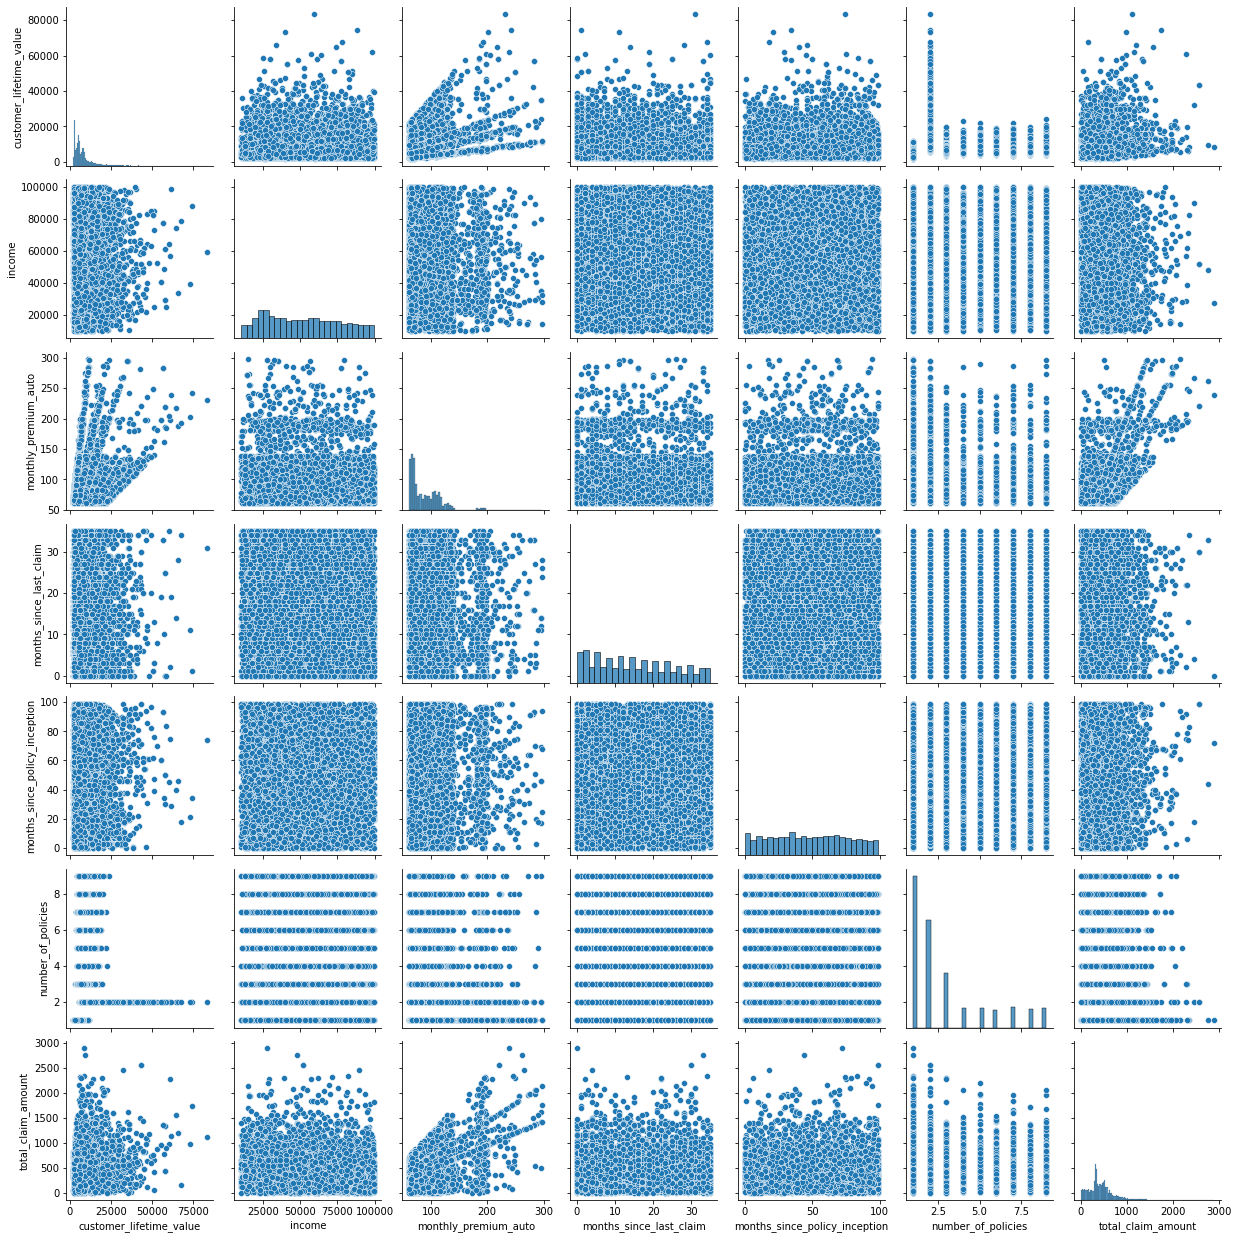

In [42]:
sns.pairplot(ca_numerical)

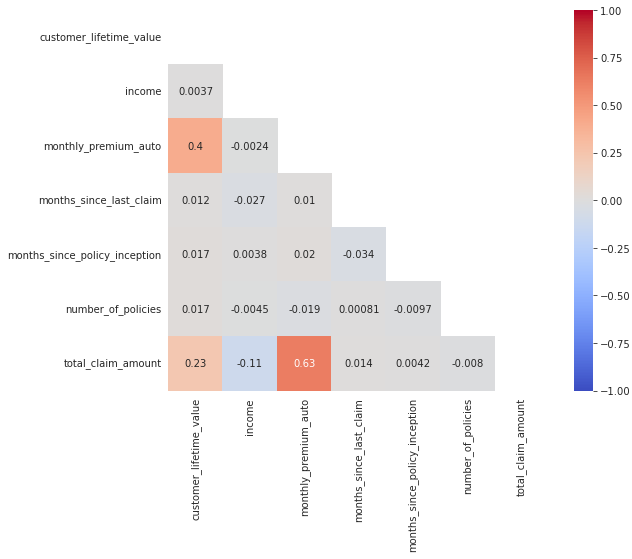

In [43]:
corr = ca_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [44]:
corr_matrix=ca_numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

- no feature is above 0.8 corrleation thats why we keep all of them


# X-y split
- (y is the target variable, which is the total claim amount)


In [45]:
ca_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
 6   total_claim_amount             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


In [46]:
X=ca_numerical.drop('total_claim_amount', axis=1)
y=ca_numerical.total_claim_amount


In [47]:
X=X._get_numeric_data()

In [48]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809,48029,61,7,52,9
1,2228,92260,64,3,26,1
2,14947,22139,100,34,31,2
3,22332,49078,97,10,3,2
4,9025,23675,117,33,31,7
...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7
10685,5259,61146,65,7,68,6
10686,23893,39837,201,11,63,2
10687,11971,64195,158,0,27,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc741e21950>,
      dtype=object)

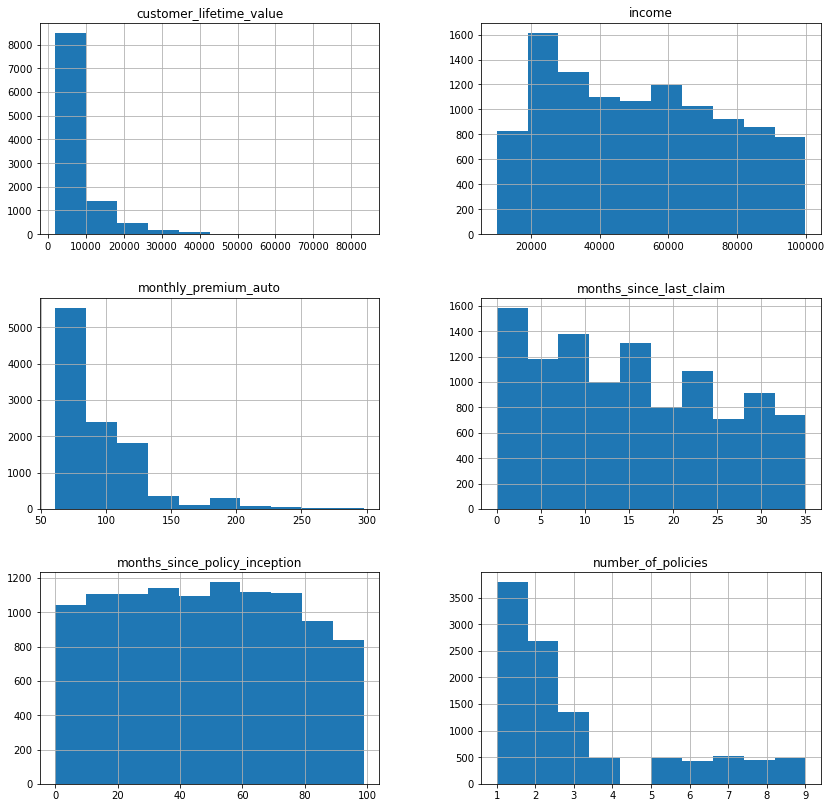

In [49]:
X.hist(figsize=(14,14))

# Train-test split
- Standardize the data (after the data split).

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [51]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [52]:
X_train.shape

(7482, 6)

In [53]:
X_test_scaled=std_scaler.transform(X_test)

In [54]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]
